In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')
df = data.sample(frac=0.1, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 43428 to 256882
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float6

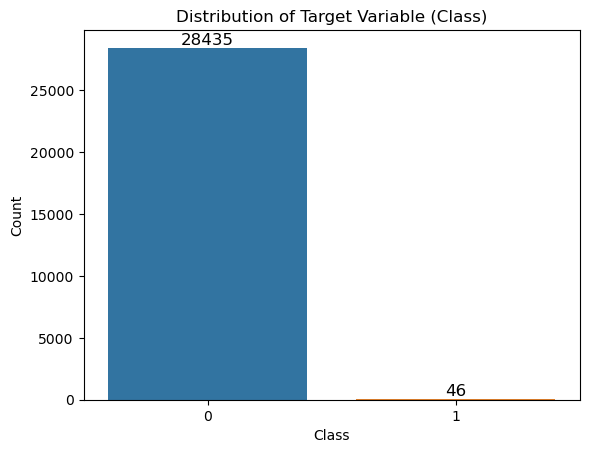

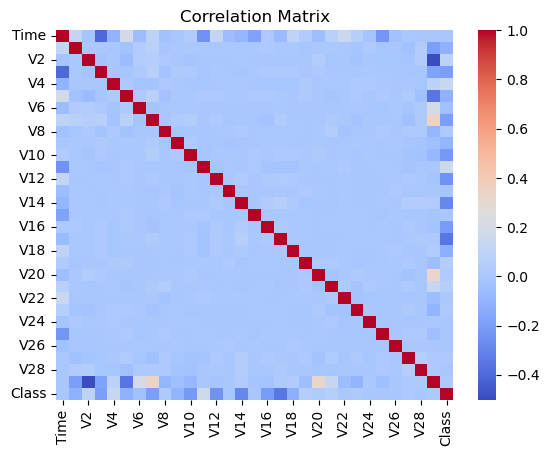

In [3]:
# Display basic information about the dataset
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')

# Add the count numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                   fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Explore correlations between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define a range of K values and distance metrics
k_values = [3, 5, 7, 9, 11]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Store accuracy scores for different K values and distance metrics
accuracy_scores = {}


In [6]:
for metric in distance_metrics:
    accuracy_scores[metric] = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm='kd_tree')  # Using kd_tree
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[metric].append(accuracy)

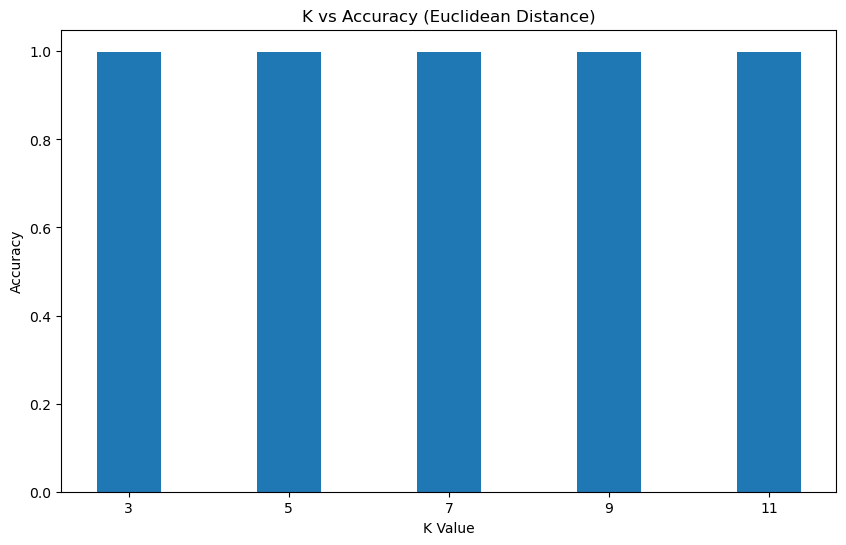

Best k value: 5


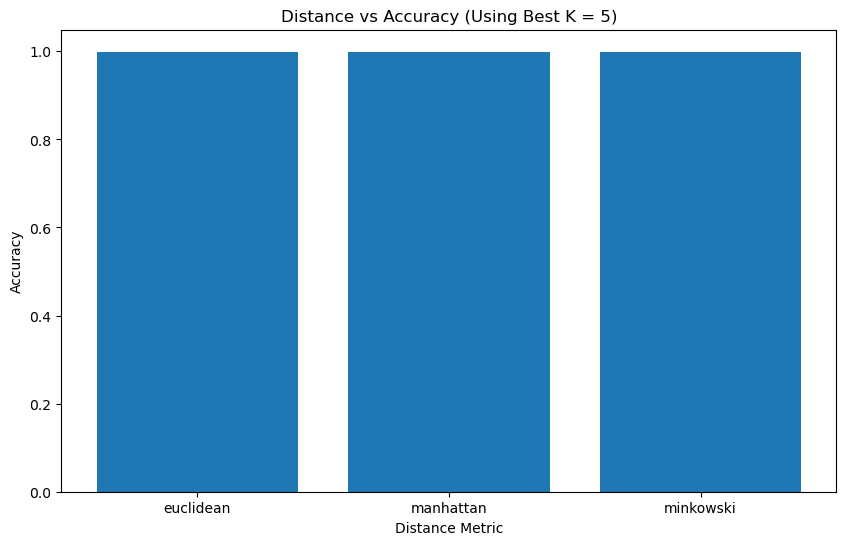

Best k value: 5
Accuracy: 0.9991223450939091
Confusion Matrix:
[[5688    3]
 [   2    4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.57      0.67      0.62         6

    accuracy                           1.00      5697
   macro avg       0.79      0.83      0.81      5697
weighted avg       1.00      1.00      1.00      5697



In [14]:
plt.figure(figsize=(10, 6))

# Calculate accuracy for each K value using Euclidean distance (or your preferred metric)
accuracy_scores_k = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Use your preferred metric
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_k.append(accuracy)

plt.bar(k_values, accuracy_scores_k)  # Plot accuracy for each K value
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy (Euclidean Distance)')  # Update title to reflect the metric used
plt.xticks(k_values)  # Set x-axis ticks to k_values
plt.show()

best_k = k_values[np.argmax(accuracy_scores_k)]  # Find K with highest accuracy
print(f"Best k value: {best_k}")

# Bar chart for Distance vs. Accuracy (using best K)
plt.figure(figsize=(10, 6))

# Calculate accuracy for each distance metric using the best K value
accuracy_scores_best_k = []
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_best_k.append(accuracy)

plt.bar(distance_metrics, accuracy_scores_best_k)  # Plot accuracy for each distance metric
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title(f'Distance vs Accuracy (Using Best K = {best_k})')
plt.show()
# Choose the best K value based on accuracy
best_k = k_values[np.argmax(accuracy_scores['euclidean'])]# Assuming Euclidean distance performs best
print(f"Best k value: {best_k}")
# Apply KNN with the best K value
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Number of features after PCA: 27


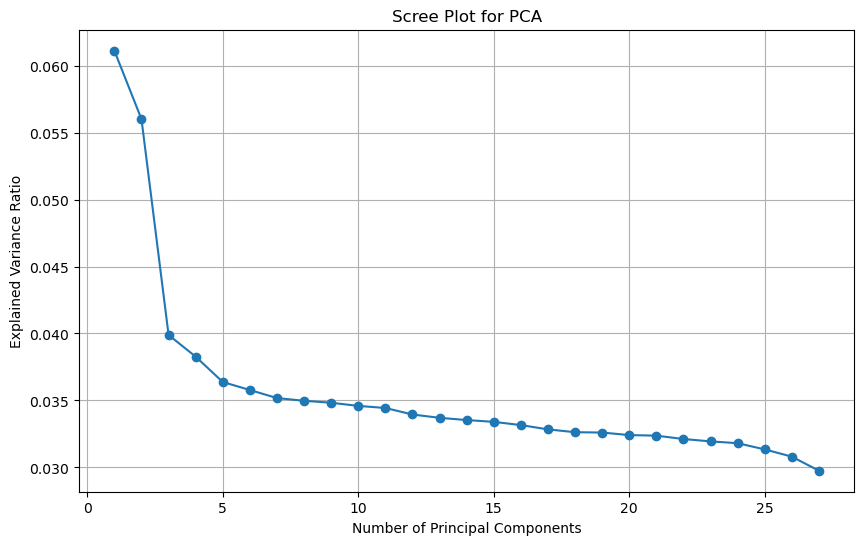

Accuracy with PCA: 0.9991223450939091
Confusion Matrix with PCA:
[[5688    3]
 [   2    4]]
Classification Report with PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.57      0.67      0.62         6

    accuracy                           1.00      5697
   macro avg       0.79      0.83      0.81      5697
weighted avg       1.00      1.00      1.00      5697



In [8]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of features after PCA
print("Number of features after PCA:", pca.n_components_)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()
# Apply KNN with the best K value and PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate performance
print(f"Accuracy with PCA: {accuracy_score(y_test, y_pred_pca)}")
print("Confusion Matrix with PCA:")
print(confusion_matrix(y_test, y_pred_pca))
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca))

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

points = X_train  # Use training data points
predicted_classes = knn.predict(X_train)  # Get predicted classes for training data

# Create a color map for the classes
colors = ['red' if c == 1 else 'blue' for c in predicted_classes]

# Compute Voronoi tessellation
vor = Voronoi(points)

# Plot the Voronoi diagram with colored regions
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black', line_width=1, line_alpha=0.6, point_size=2)
for region, color in zip(vor.regions, colors):
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=color, alpha=0.4)

plt.title('Voronoi Diagram for KNN Model')
plt.show()